# Training Mask R-CNN Model with Custom Dataset on Google Colab
In this Google Colab/Jupyter Notebook (depending on where you would like to load your file), we will be training a Mask R-CNN model using our own custom dataset. 

If you do not have GPU installed in your computer, I would highly recommend you to do so in order to save countless of training hours. Otherwise, you may want to consider training your models on the cloud, such as Google Colab. To utilise GPU on Google Colab, simply select the runtime option at the top bar, click "Change runtime type" and select GPU.

Before we start on training our own dataset, please read more about Mask R-CNN and its basic concepts online or via this [article](https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/).

#Preparing the Dataset

Often, Mask R-CNN datasets are annotated into json or xml files. The formats depend on the code of your training file on how you break down your datasets. For this project, we will be using the **coco format **for our datasets. 

You can annotate your dataset with the [VGG Annotator online](http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html). It is intuitive and easy to use. However, do take note of the following precautions when annotating your images:
1. Draw only **polygons**, as rectangles are will not produce X-Y coordinates needed during training.

2. If your objects are close to the edge of the image, please take precaution to draw your boundaries within the image, otherwise an error will be produced during training.

3. Save both coco and json formats of your annotations just in case. When you want to load your annotations into VGG again, using the json format file will allow it to be more accurate, as coco formats do not preserve the names of the objects within your images.

Afterwards, we will be making some edits to the coco file. When annotating your images, you would have realised that the categories that can be chosen are limited. In order to edit classes and categories of your images, scroll to the bottom of your coco file, and edit according to the example below:

In [ ]:
#example of how to edit last paragrah of coco file
"categories": [
    {"supercategory": "person","id": 1,"name": "person"},
    {"supercategory": "vehicle","id": 2,"name": "bicycle"},
    {"supercategory": "vehicle","id": 3,"name": "car"},
    {"supercategory": "vehicle","id": 4,"name": "motorcycle"},
    {"supercategory": "vehicle","id": 5,"name": "airplane"},
    ...
    {"supercategory": "indoor","id": 89,"name": "hair drier"},
    {"supercategory": "indoor","id": 90,"name": "toothbrush"}
]

# Downloading Prerequisite Files
FIrst, we will be downloading all the necessary files for our Mask R-CNN model. 

We will start by installing tensorflow version 1.15.0, keras 2.1.0 and imaug version 0.4.0. 

Tensorflow and Keras are widely used packages for machine learning purposes, and imgaug will be used for image augmentation in this project.

*Note: Due to the code dependencies between these packages' versions and the Mask R-CNN codes, I have found that the versions stated above are the most compatible, and are less likely to reproduce any dependency errors.*

In [1]:
!pip install tensorflow==1.15.0
!pip install keras==2.1.0
!pip install imgaug==0.4.0

     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 3.8MB 37.3MB/s 
     |████████████████████████████████| 512kB 43.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=bc3e3187c1d7a34342fc48fb62bbd1af7a4d2f1fe48aab021982a2f538c1f3e0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

Next, we will git clone the Mask R-CNN repository as well as my own repository with my customised dataset. 

As it may take a long time to upload your hundreds of datasets into Google Drive or Google Colab, I have found that directly git cloning your files into Google Colab is the quickest and most effecient method of file transfer.

*Note: In case you may be new to Google Colab, '%cd' means that we will be redirecting to the root directory. Hence, these git repositories will be cloned into the root directory. By default, Google Colab will be in the content directory, so you can change where you want your repositories to be cloned into if you want.*

In [2]:
%cd
  
!git clone --quiet https://github.com/matterport/Mask_RCNN.git
!git clone --quiet https://github.com/saltedpotato/custom-data-with-mcrnn

/root


Next, we will download all the required packages for Mask R-CNN with the commands below.

*Note: '%cd ~/Mask_RCNN' just means that we will be redirecting into the Mask_RCNN folder in the root directory.*

In [3]:
%cd ~/Mask_RCNN

!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

/root/Mask_RCNN
     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 204kB 21.9MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linu

#Configuring the Model
To change the configurations of your model, simply open the *train.py file* and change the variables within the *CustomConfig*  function. 

The variables that can be changed can be found in the *config.py* file within the mrcnn folder.  The *config.py* file houses all the default configurations for your model, and making changes in the *CustomConfig* function in the *train.py* file will overwrite the default configuration.

The configurations of your model depends greatly on the kind of data you would like to train your model on. Hence, I am unable to give you a definite answer on what is the "best" configuration for your model. 



#Preparing for Training
Before we start training the model, we will have to edit the *train.py file* according to the classes of objects that we have. 

First, define the category that your objects belong in in line 60 as seen in the image below. Then, add in all the classes that you have in line 61.

**** NOTE: Please ensure that the name of your category is the same as the name of your supercategory in your coco annotations file, and the class names is the same as the 'name' item in your coco dictionary.**
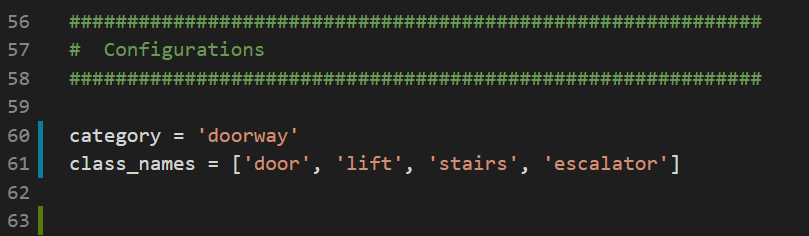

# Training the Model
From here, I will be manually reorganising my directory a little to prepare for the training. Please follow the instructions below carefully:
1.   Click on the file icon on the left bar, and redirect to the directory where you have cloned your repositories. In our case, it would be the root directory.

2.   Open the cloned GIT repository with your custom dataset in it, and drag your entire dataset folder into the cloned Mask_RCNN folder.

3.    From your cloned GIT directory, drag your train.py file into the cloned Mask_RCNN folder


**** IMPORTANT NOTE**: Google Colab has a 12 hour restriction on continuous training of model, and after the 12 hours, your runtime will be revoked, and you would not be able to use GPU to run. 

Furthermore, the weights of your model that is saved from the training will be erased, which makes your training a wasted effort. 

Hence, I would recommend that you do either of the following:
1. Redirect the saving of your weights directly into your Google Drive after mounting it on Google Colab (most of the time your drive folder will be found in the contents directory). Note that this will only work if your Google Drive has adequate space, as the weights do take up quite a large portion of memory space.

2. Check your training progress regularly and save your trained weights at regular checkpoints.



Now after completing the steps above, you would be ready to train your Mask R-CNN model. The code below simply means that we will be training train.py file, and our dataset is in the dataset folder within root/Mask_RCNN directory, and we will be using the pretrained coco weights for a start. Since the logs folder is not specified, a logs folder will be created for you within the Mask_RCNN folder, where your trained weights will be saved in.

In [4]:
%cd ~/Mask_RCNN

!python train.py train --dataset=dataset/ --weights=mask_rcnn_doorway_0068.h5

/root/Mask_RCNN
Using TensorFlow backend.
Weights:  mask_rcnn_doorway_0068.h5
Dataset:  dataset/
Logs:  /root/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 

#Evaluating the Model

After training the model, we would have to choose the best pretrained weights to evaluate. As mentioned before, the pretrained weights should have been saved in the logs folder inside Mask_RCNN folder unless you have previously indicated otherwise.

Either manually or by using [TensorBoard](https://www.tensorflow.org/tensorboard/get_started), we should choose the weights with the **lowest validation loss** to be evaluated, in order to minimise overfitting of the model.

To use TensorBoard, simply download the first file in your logs folder named *events.out.tfevents...* . Afterwards, open your command prompt and navigate to the folder containing your saved events file, and run the following in your command prompt:

*tensorboard --logdir=./logs --host=127.0.0.1 --port=8080* 

The result should produce a link for you to follow, where you would be navigated to the TensorBoard webpage. There, you would be able to see the graphs of all your losses, including your **validation loss**.


After you have chosen the weights with the lowest validation loss, replace the custom_WEIGHTS_PATH below with the path of your pretrained weights, and run the cell.

In [5]:
%cd ~/Mask_RCNN
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import expand_dims
from numpy import mean
from numpy import zeros
from numpy import asarray

import train

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

#replace the value with the path of your pretrained weights
custom_WEIGHTS_PATH = "/root/Mask_RCNN/mask_rcnn_doorway_0062.h5"

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = train.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset")

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
  
# Load validation dataset
dataset = train.CustomDataset()
dataset.load_custom(custom_DIR, "predict")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print(custom_WEIGHTS_PATH)
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

/root/Mask_RCNN


Using TensorFlow backend.
100%|██████████| 4/4 [00:00<00:00, 1237.17it/s]


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
/root/Mask_RCNN/mask_rcnn_doorway_0062.h5
Loading weights  /root/Mask_RCNN/mask_rcnn_doorway_0062.h5








<module 'mrcnn.visualize' from '/root/Mask_RCNN/mrcnn/visualize.py'>

Run the cell below to visualise how well your model is doing with object detection and instance segmentation.

In [6]:
#image_id = random.choice(dataset.image_ids)
for image_id in dataset.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

  # Run object detection
  results = model.detect([image], verbose=1)

  # Display results
  ax = get_ax(1)
  r = results[0]
  
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                               dataset.class_names, r['scores'], ax=ax,
                               title="Predictions")
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)

Output hidden; open in https://colab.research.google.com to view.

Besides evaluating the model visually, we can also calculate its mean **Average Precision (mAP)** to find out how well it is doing with our datasets.

Below are the functions required to calculate the mAP, taken from this [article](https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/) by Jason Brownlee. 

Please comment out the datasets that you do not have in order to avoid errors.

A good score would typically be above 0.9.

In [7]:
# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = train.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset")

# train set
train_set = train.CustomDataset()
train_set.load_custom(custom_DIR, "train")
train_set.prepare()

# load the val dataset
val_set = train.CustomDataset()
val_set.load_custom(custom_DIR, "val")
val_set.prepare()

# load the predict dataset
test_set = train.CustomDataset()
test_set.load_custom(custom_DIR, "predict")
test_set.prepare()

class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "doorway_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 4
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

# create config
cfg = PredictionConfig()
# define the model
model = modellib.MaskRCNN(mode='inference', model_dir='./', config=cfg)

100%|██████████| 4/4 [00:00<00:00, 3754.13it/s]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [8]:
# load model weights
model.load_weights(custom_WEIGHTS_PATH, by_name=True)
# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on validation dataset
val_mAP = evaluate_model(val_set, model, cfg)
print("Val mAP: %.3f" % val_mAP)
#evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)

Train mAP: 0.837
Val mAP: 0.705
Test mAP: 0.625


You may also compare what you have annotated earlier in VGG with what the model has predicted by running the code below.

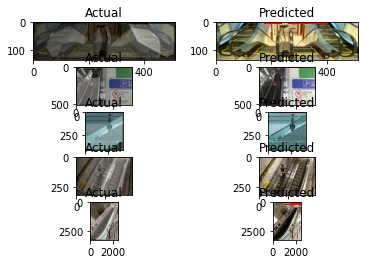

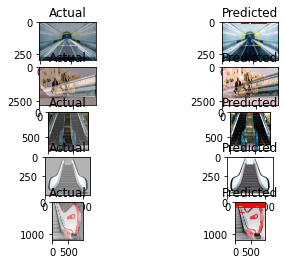

In [ ]:
from matplotlib.patches import Rectangle
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
	# load image and mask
	for i in range(n_images):
		# load the image and mask
		image = dataset.load_image(i)
		mask, _ = dataset.load_mask(i)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)[0]
		# define subplot
		plt.subplot(n_images, 2, i*2+1)
		# plot raw pixel data
		plt.imshow(image)
		plt.title('Actual')
		# plot masks
		for j in range(mask.shape[2]):
			plt.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
		# get the context for drawing boxes
		plt.subplot(n_images, 2, i*2+2)
		# plot raw pixel data
		plt.imshow(image)
		plt.title('Predicted')
		ax = plt.gca()
		# plot each box
		for box in yhat['rois']:
			# get coordinates
			y1, x1, y2, x2 = box
			# calculate width and height of the box
			width, height = x2 - x1, y2 - y1
			# create the shape
			rect = Rectangle((x1, y1), width, height, fill=False, color='red')
			# draw the box
			ax.add_patch(rect)
	# show the figure
	plt.show()

# plot predictions for train dataset
plot_actual_vs_predicted(train_set, model, cfg)
# plot predictions for test dataset
plot_actual_vs_predicted(val_set, model, cfg)

# Saving the Model
Lastly, we would want to save the model for future use. Mask R-CNN codes do not originally save the entire model, including its weights and architecture. Hence, people often need to load in their pretrained weights into the model in inference mode and use the model from there on.

However, if you would like to save the entire model, including its architecture, then you can follow the guide below. Otherwise, you may skip this section.

## Saving Model as JSON or .h5 keras model Formats
 Suchit210Jadhav from GitHub has modified his model.py in the mrcnn folder to save and load entire Mask R-CNN models [here](https://github.com/Suchit210Jadhav/Save-Load-MaskRCNN-model).

 However, given that the code in the recommended GitHub repository is long and tedious to decipher its difference between the modified and original model.py, hence you may view the main difference done to model.py in the screenshot below. Otherwise, you may simply use the model.py file from my GitHub Repository that was cloned earlier.

 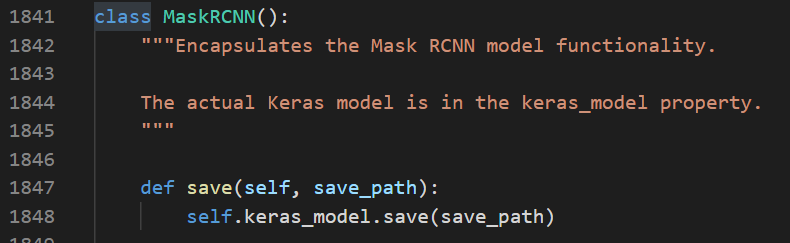


In [ ]:
#save model into json file
model_json = model.keras_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved JSON file in disk")

#save model into .h5 file
model.keras_model.save('model.h5')
print("Saved model in disk")

## Saving Model as .pb Format
The code below was referenced from this [StackOverflow Discussion](https://stackoverflow.com/questions/45466020/how-to-export-keras-h5-to-tensorflow-pb).

If you have used the model.py from my repository instead, your model should have already been saved as a .pb file after the last epoch. However this method automatically takes in the weights of the last epoch. 

Hence, you can run the code below manually if you have handpicked the epoch with the lowest validation loss, as I have mentioned earlier.

In [ ]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [ ]:
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.keras_model.outputs])

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 690 variables.
INFO:tensorflow:Converted 690 variables to const ops.


In [ ]:
#The middle arguement is where you would like your .pb file to be saved.
tf.train.write_graph(frozen_graph, "mrcnn", "my_model.pb", as_text=False)

'mrcnn/my_model.pb'